### Algas 🌿

**Simulação do cenário da coleta de dados de velocidade do ar e pressão atmosférica**

Anemometro medindo de 0 a 120 Km/h

BMP180 medindo de 300 a 1100hpa


*1º Caso - transação baixa*

*2º Caso - transação moderada*

*3º Caso - transação alta*

*Teste local com 16Gb de RAM e uma CPU i7  1.80GHz-1.99 GHz*

In [1]:
import psutil
import random
import mysql.connector
from matplotlib import pyplot as plt
from time import time, sleep
from datetime import date
from sys import getsizeof 

In [2]:
blocks = [
    block for block in 
    [
        [x for x in range(1, 1000, 100)],
        [x for x in range(1, 1000, 10)],
        [x for x in range(1, 1000, 1)]
    ]
]

In [3]:
mydb = mysql.connector.connect(
    host = "localhost",
    user = 'root',
    password = "----------",
    database = "test"
)
mycursor = mydb.cursor()

sql_query = f"INSERT INTO test_1(sensor, time_taken, bytes_used, cpu_used, ram_used) VALUES ('sensor',%s,%s,%s,%s)"
sql_query2 = f"INSERT INTO medidas(sensor, value, ingestion_date) VALUES (%s,%s,%s)"

In [4]:
#T(n) = 12n^2+18n+6 -> 
#T(n) = An^2+Bn+C
#T(n) = O(n^2)

def transaction(block, idx_param):
    bytes_used = [] #1
    cpu_used = []   #1
    ram_used = []   #1
    time_taken = [] #1
    
    for value in block: #n
        start_time = time() #1n
        bytes_int = 0 #1n
        for i in range(value): #n*n
            air_speed = round(random.uniform(0, 120),2) #2n*n
            atmospheric_pressure = round(random.uniform(1000, 1020),2) #2n*n
            bytes_int = bytes_int + getsizeof(air_speed) + getsizeof(atmospheric_pressure) #5n*n
            sleep(0.01) #1n*n
            end_time = time() #1n*n
        
        execution_time = end_time - start_time #1n
        cpu = psutil.cpu_percent() #1n
        ram = psutil.virtual_memory().percent #2n

        bytes_used.append(bytes_int) #1n
        cpu_used.append(cpu) #1n
        ram_used.append(ram - 50) #1n
        time_taken.append(execution_time) #1n

        mycursor.execute(sql_query, [execution_time, bytes_int, cpu, ram]) #2n
        mycursor.execute(sql_query2, ["BMP180", atmospheric_pressure, date.today()]) #3n
        mycursor.execute(sql_query2, ["anemometro", air_speed, date.today()]) #3n
        mydb.commit() #1n
    
    print(f"{value} concluded") #1

    return {
            f"block_{idx_param+1}": block,
            "time_taken": time_taken,
            "bytes_used": bytes_used,
            "cpu_used": cpu_used,
            "ram_used": ram_used,
        } #1

In [10]:
blocks_infos = []

In [11]:
# for idx, block in enumerate(blocks):
#     blocks_infos.append(transaction(block=block, idx_param=idx))
    
# blocks_infos.append(transaction(block=blocks[0], idx_param=0)) ##1m11.6s
# blocks_infos.append(transaction(block=blocks[1], idx_param=1)) ##12m.59s
blocks_infos.append(transaction(block=blocks[2], idx_param=2)) ##131m.34s

999 concluded


**Plot da execução**

In [8]:
def plot_block_ram_cpu(
        number_block: int = 1
    ) -> None:

    plt.title(f'Bloco {number_block}:')
    plt.plot(
        blocks_infos[number_block-1]['time_taken'],
        blocks_infos[number_block-1]['cpu_used'],
        label = 'CPU usage',
        linestyle="-."
    )
    plt.plot(
        blocks_infos[number_block-1]['time_taken'],
        blocks_infos[number_block-1]['ram_used'],
        label = 'RAM usage',
        linestyle="--"
    )
    plt.legend()
    plt.show()
  

def plot_block(number_block):
    plt.xlabel('Espaço (Mb)', color= 'black')
    plt.ylabel('Tempo (s)', color= 'black')
    plt.title(f'Bloco {number_block}:')
    plt.plot(
        blocks_infos[number_block-1]['bytes_used'],
        blocks_infos[number_block-1]['time_taken'],
    ) 

def plot_block_execution_time(number_block):
    plt.title(f'Bloco {number_block}:')
    plt.plot(
        blocks_infos[number_block-1]['time_taken'],
        blocks[number_block-1],
    )      

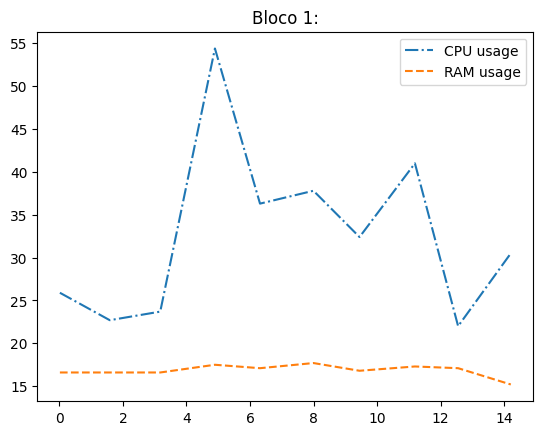

In [12]:
plot_block_ram_cpu(number_block=1)

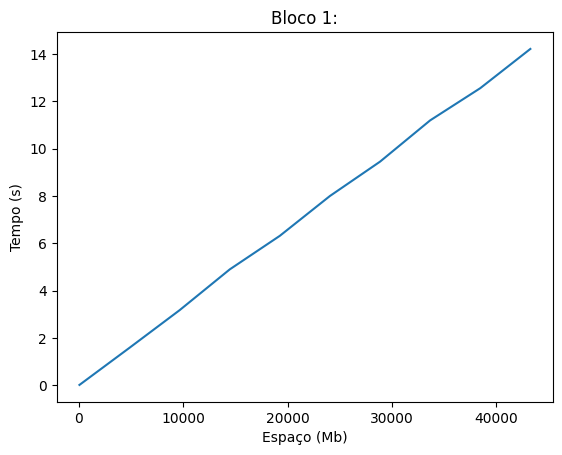

In [9]:
plot_block(number_block=1)

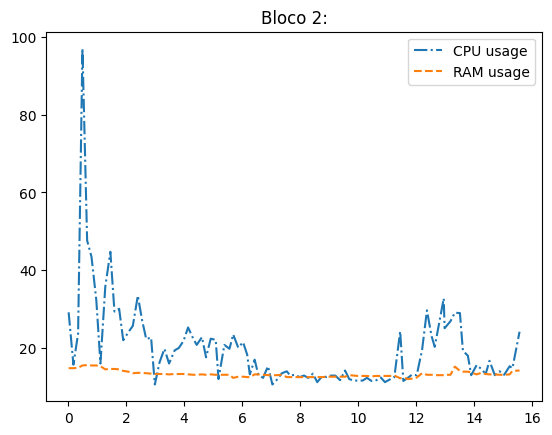

In [18]:
plot_block_ram_cpu(number_block=2)

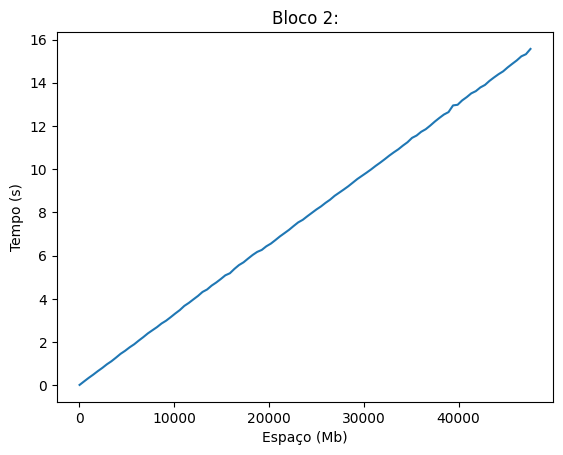

In [19]:
plot_block(number_block=2)

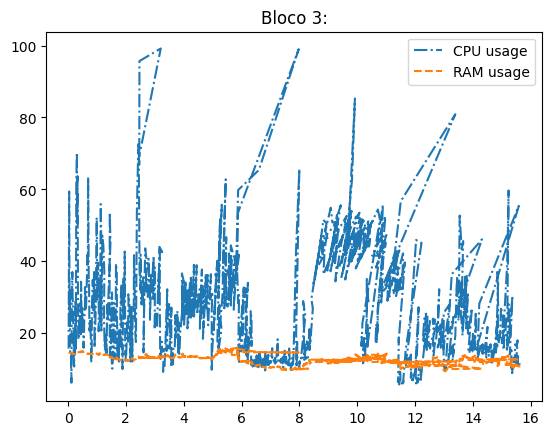

In [23]:
plot_block_ram_cpu(number_block=3)

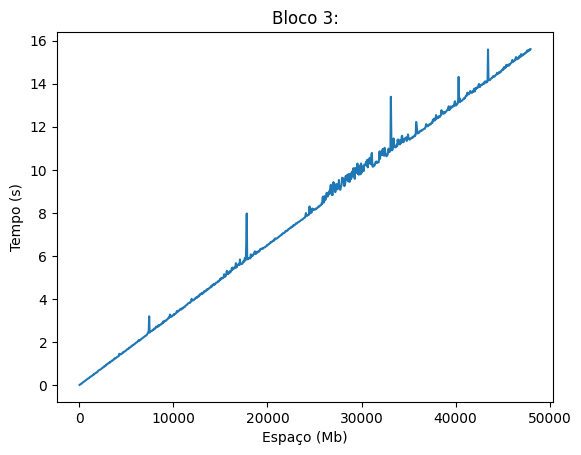

In [24]:
plot_block(number_block=3)

*Leitura dos dados*

In [3]:
def get_data():
    mycursor.execute("SELECT * FROM medidas")
    result = mycursor.fetchall()

    air_speed = [value[2] for value in result if value[1] == 'anemometro']
    atmospheric_pressure = [value[2] for value in result if value[1] == 'BMP180']

    return air_speed, atmospheric_pressure

In [5]:
air_speed, atmospheric_pressure = get_data()

(array([1209., 1229., 1180., 1200., 1204., 1207., 1276., 1235., 1218.,
        1250.]),
 array([4.00000e-02, 1.20350e+01, 2.40300e+01, 3.60250e+01, 4.80200e+01,
        6.00150e+01, 7.20100e+01, 8.40050e+01, 9.60000e+01, 1.07995e+02,
        1.19990e+02]),
 <BarContainer object of 10 artists>)

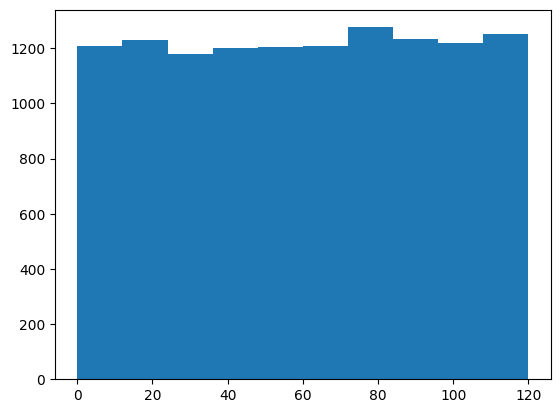

In [12]:
plt.hist(air_speed)

(array([1227., 1209., 1166., 1197., 1290., 1269., 1213., 1212., 1215.,
        1210.]),
 array([1000., 1002., 1004., 1006., 1008., 1010., 1012., 1014., 1016.,
        1018., 1020.]),
 <BarContainer object of 10 artists>)

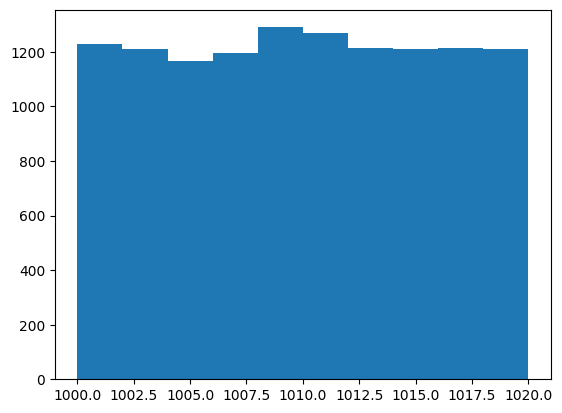

In [13]:
plt.hist(atmospheric_pressure)

*Teste Conexão com o banco*

In [ ]:
mydb = mysql.connector.connect(
    host = "localhost",
    user = 'root',
    password = "yh@852147",
    database = "test"
)

mycursor = mydb.cursor()
sql_query = f"INSERT INTO test_1(sensor, time_taken, bytes_used, cpu_used, ram_used) VALUES ('sensor1',%s,%s,%s,%s)"
# test = [2.1, 2.2, 2.3, 2.4]
# mycursor.execute(sql_query, test)

# mydb.commit()
# mycursor.close()
# mydb.close()
# print("Conexão com MySQL está fechada\n")

*Exemplo de select*

In [ ]:
mycursor.execute("SELECT * FROM test_1")
result = mycursor.fetchall()

time_taken = [ value[2] for value in result]
bytes_used = [ value[3] for value in result]
cpu_used = [ value[4] for value in result]
ram_used = [ value[5] for value in result]